<a href="https://colab.research.google.com/github/LeTrungDunggg/LeTrungDunggg/blob/main/Bai3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as ma
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [ ]:
create_data=[]
for i in range(0,180,2):
    array=[]
    for j in range(0,200,2):
        k=180-i-j
        x=50*ma.cos(ma.radians(i))+40*ma.cos(ma.radians(i+j))+30*ma.cos(ma.radians(i+j+k))
        y=50*ma.sin(ma.radians(i))+40*ma.sin(ma.radians(i+j))+30*ma.sin(ma.radians(i+j+k))
        array.append(np.array((i,j,k,x,y)))
    create_data.extend(array)

In [ ]:
header = ['alpha', 'beta', 'sigma' ,'x', 'y']
with open('robot_3d.csv', 'w', encoding='UTF8', newline='') as data_table:
    viet = csv.writer(data_table)
    viet.writerow(header)
    viet.writerows(create_data)

In [ ]:
data=pd.read_csv('robot_3d.csv')
data.iloc[5350:5400]

,alpha,beta,sigma,x,y
5350,106.0,100.0,-26.0,-79.733630,30.528239
5351,106.0,102.0,-28.0,-79.099772,29.284222
5352,106.0,104.0,-30.0,-78.422884,28.063085
5353,106.0,106.0,-32.0,-77.703792,26.866314
5354,106.0,108.0,-34.0,-76.943371,25.695369
5355,106.0,110.0,-36.0,-76.142548,24.551675
5356,106.0,112.0,-38.0,-75.302298,23.436626
5357,106.0,114.0,-40.0,-74.423646,22.351580
5358,106.0,116.0,-42.0,-73.507661,21.297861
5359,106.0,118.0,-44.0,-72.555460,20.276750


In [ ]:
x_data=np.array(data.drop(['alpha','beta','sigma'],axis=1))
y_data=np.array(data[['alpha','beta','sigma']])
y_data.shape

(9000, 3)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1)
x_train.shape

(8100, 2)

In [ ]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3,  activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 11,411
Trainable params: 11,411
Non-traina

In [ ]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
history=model.fit(x_train,y_train,batch_size=200,epochs=1000,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=30)]) 

Epoch 1/1000
33/33 [==============================] - 3s 28ms/step - loss: 9599.0898 - mean_absolute_error: 82.2390 - val_loss: 8421.1738 - val_mean_absolute_error: 76.2717
Epoch 2/1000
33/33 [==============================] - 0s 10ms/step - loss: 5937.9302 - mean_absolute_error: 61.5837 - val_loss: 3904.0791 - val_mean_absolute_error: 46.7620
Epoch 3/1000
33/33 [==============================] - 1s 16ms/step - loss: 3665.2327 - mean_absolute_error: 43.3284 - val_loss: 3542.9470 - val_mean_absolute_error: 41.3314
Epoch 4/1000
33/33 [==============================] - 0s 11ms/step - loss: 3492.2864 - mean_absolute_error: 40.8401 - val_loss: 3514.5852 - val_mean_absolute_error: 41.5164
Epoch 5/1000
33/33 [==============================] - 0s 12ms/step - loss: 3463.7520 - mean_absolute_error: 40.7136 - val_loss: 3471.8684 - val_mean_absolute_error: 40.6966
Epoch 6/1000
33/33 [==============================] - 0s 10ms/step - loss: 3433.1484 - mean_absolute_error: 40.3012 - val_loss: 3444.47

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test mae:',score[1])

Test loss: 134.2511749267578
Test mae: 6.122522830963135


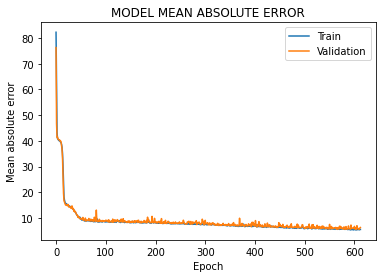

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred[300]

array([103.26374, 140.57819, -66.44225], dtype=float32)

In [ ]:
y_test[300]

array([106., 142., -68.])